In [ ]:
# import libraries
from gettext import install
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("/content/smart watch price (1).csv")

In [ ]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [ ]:
df.isna().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [ ]:
# Replace null values in object columns with mode
object_columns = df.select_dtypes(include=["object"]).columns
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


In [ ]:
# Replace null values in float columns with mode
float_columns = df.select_dtypes(include=["float64"]).columns
for col in float_columns:
    mode_value = df[col].mode()
    df[col] = df[col].fillna(mode_value)


In [ ]:
df = df.rename(columns={'Display Size (inches)': 'Display Size',
                        'Water Resistance (meters)': 'Water Resistance',
                        'Battery Life (days)': 'Battery Life',
                        'Price (USD)': 'Price'})


In [ ]:
df['Water Resistance']. unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

In [ ]:
df['Water Resistance'].describe()

count     379
unique      7
top        50
freq      276
Name: Water Resistance, dtype: object

In [ ]:
df['Water Resistance'] = df['Water Resistance'].replace({'Not specified': 50})

In [ ]:
df['Display Size'].unique()

array([1.9 , 1.4 , 1.3 , 1.58, 1.28, 1.43, 1.75, 1.39,  nan, 1.65, 1.2 ,
       1.57, 1.  , 1.78, 1.91, 1.38, 1.06, 1.35, 1.34, 0.9 , 1.04, 1.64,
       1.19, 4.01, 1.6 , 1.42, 2.1 , 1.23, 1.1 , 1.22, 1.5 , 1.36, 1.32])

In [ ]:
df['Display Size'] = df['Display Size']. round(1)

In [ ]:
df ['Battery Life'] .unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [ ]:
df[ 'Battery Life'] .describe()

count     379
unique     30
top        14
freq       84
Name: Battery Life, dtype: object

In [ ]:
df['Battery Life'] = df['Battery Life'].replace ({'48 hours' :'14','Unlimited':'14' })

In [ ]:
df['Price'] = df['Price'].str[1:]

In [ ]:
df['Water Resistance'] = df['Water Resistance'].astype(float)

In [ ]:
print(df.columns)

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size', 'Resolution', 'Water Resistance', 'Battery Life',
       'Heart Rate Monitor', 'GPS', 'NFC', 'Price'],
      dtype='object')


In [ ]:
df['Battery life'] = df['Battery Life'].astype(float)

In [ ]:
print(df.columns)

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size', 'Resolution', 'Water Resistance', 'Battery Life',
       'Heart Rate Monitor', 'GPS', 'NFC', 'Price', 'Battery life'],
      dtype='object')


In [ ]:
print(df['Price'].unique())

['399 ' '249 ' '229 ' '299 ' '499 ' '199 ' '195 ' '279 ' '179 ' '649 '
 '349 ' '329 ' '295 ' '599 ' '255 ' '139 ' '149 ' '479 ' '59 ' '219 '
 '275 ' '129 ' '119 ' '159 ' '799 ' '849 ' '189 ' '549 ' '569 ' '449 '
 '49 ' '69 ' '99 ' '209 ' '269 ' '699 ' '120 ' '1,500 ' '990 ' '1,650 '
 '375 ' '150 ' '79 ' '1,230 ' '1,800 ' '1,200 ' '1,170 ' '259 ' '325 '
 '350 ']


In [ ]:
lb = LabelEncoder()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
for col in categorical_cols:
    df[col] = lb.fit_transform (df[col])

In [ ]:
df['price'] = df['Price'].astype(float)

In [ ]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price,Battery life,price
0,1,127,34,2,17,1.9,27,50.0,8,0,1,1,33,18.0,33.0
1,30,36,31,2,0,1.4,31,50.0,16,0,1,1,20,40.0,20.0
2,8,105,9,1,0,1.3,30,50.0,3,0,1,0,33,11.0,33.0
3,6,109,7,1,0,1.6,19,50.0,21,0,1,1,19,6.0,19.0
4,7,43,31,1,0,1.3,30,30.0,11,0,1,1,27,24.0,27.0


In [ ]:
df.describe(include='all')

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price,Battery life,price
count,379.000000,379.000000,379.000000,379.000000,379.000000,376.000000,379.000000,379.000000,379.000000,379.0,379.000000,379.00000,379.000000,379.000000,379.000000
mean,18.168865,68.606860,20.778364,1.203166,6.941953,1.367819,22.139842,52.804749,10.168865,0.0,0.920844,0.83905,24.081794,12.208443,24.081794
std,13.040757,38.933753,11.407946,0.532927,8.978918,0.219943,9.080415,26.939235,6.395516,0.0,0.270338,0.36797,10.081476,12.326042,10.081476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,1.500000,0.000000,0.0,0.000000,0.00000,0.000000,1.000000,0.000000
25%,7.000000,33.500000,9.000000,1.000000,0.000000,1.200000,17.500000,50.000000,5.000000,0.0,1.000000,1.00000,16.000000,3.000000,16.000000
50%,16.000000,71.000000,27.000000,1.000000,0.000000,1.400000,23.000000,50.000000,9.000000,0.0,1.000000,1.00000,25.000000,11.000000,25.000000
75%,31.000000,102.000000,31.000000,1.000000,14.000000,1.400000,32.000000,50.000000,13.000000,0.0,1.000000,1.00000,30.000000,15.000000,30.000000
max,41.000000,136.000000,34.000000,4.000000,26.000000,4.000000,35.000000,200.000000,27.000000,0.0,1.000000,1.00000,49.000000,72.000000,49.000000


<ipython-input-126-c9acdcc41fed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_brands, y=counts, palette='muted')
<ipython-input-126-c9acdcc41fed>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (ax.get_xticklabels(), rotation=45, ha='right')


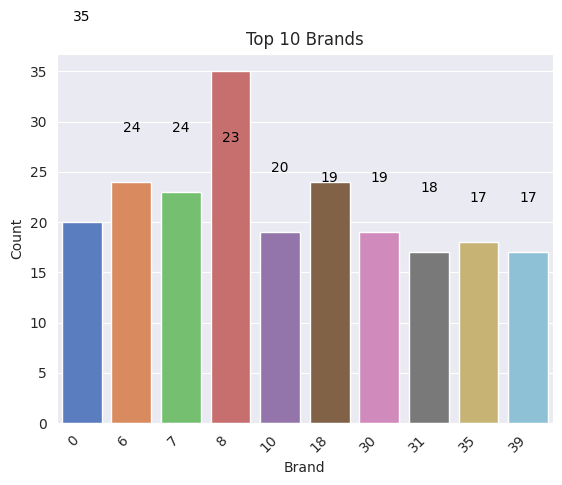

In [ ]:
#Get the top 10 brands
top_brands = df['Brand']. value_counts(). index[:10]
counts = df['Brand'] . value_counts(). values[:10]

# Set the style
sns.set_style("darkgrid")

# Create the bar plot using Seaborn
ax = sns.barplot(x=top_brands, y=counts, palette='muted')

# Set the x-tick labels to be rotated and aligned properly
ax.set_xticklabels (ax.get_xticklabels(), rotation=45, ha='right')

# Add value labels on the bars
for i, v in enumerate(counts):
  ax. text(i, v+5, str(v), color='black', ha= 'center')

  # Set the axis labels and title
ax. set (xlabel= 'Brand', ylabel= 'Count', title='Top 10 Brands')

# Display the plot
plt. show()


<ipython-input-127-772bf04f81bc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_os, y=os_counts, palette= 'magma' )


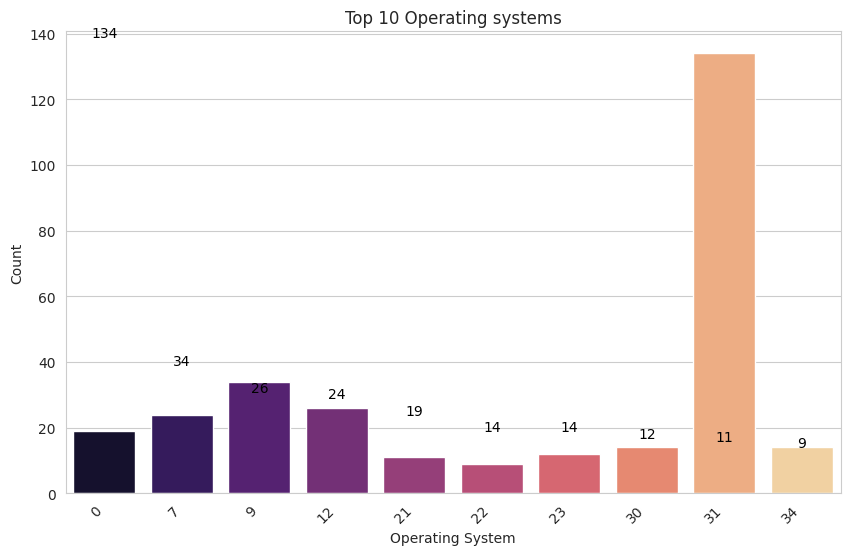

In [ ]:
# Set the plot style
sns. set_style( 'whitegrid')

# Get the top 10 operating systems
top_os = df['Operating System']. value_counts().index[:10]
os_counts = df[ 'Operating System']. value_counts().values [:10]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=top_os, y=os_counts, palette= 'magma' )

# Set the axis labels and title
ax.set(xlabel='Operating System', ylabel='Count', title='Top 10 Operating systems')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, v in enumerate(os_counts):
 ax.text(i, v+5, str(v), color='black', ha= 'center')

# Display the plot
plt.show()

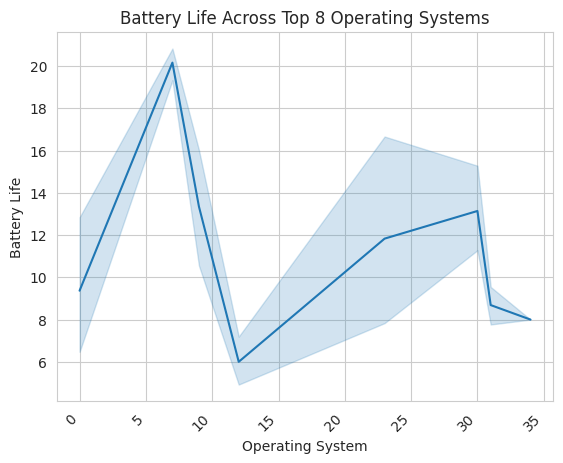

In [ ]:
# Filter the top 8 operating systems by frequency count
top_operating_systems = df['Operating System'].value_counts().head(8).index.tolist()
data_top_operating_systems = df[df['Operating System'].isin(top_operating_systems)]

# Set the plot style
sns.set_style('whitegrid')

# Create the line plot
sns.lineplot(x='Operating System', y='Battery Life', data=data_top_operating_systems)

# Set the axis labels and title
plt.xlabel('Operating System')
plt.ylabel('Battery Life')
plt.title('Battery Life Across Top 8 Operating Systems')

# Align x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


<ipython-input-129-2eae9c71ab43>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])


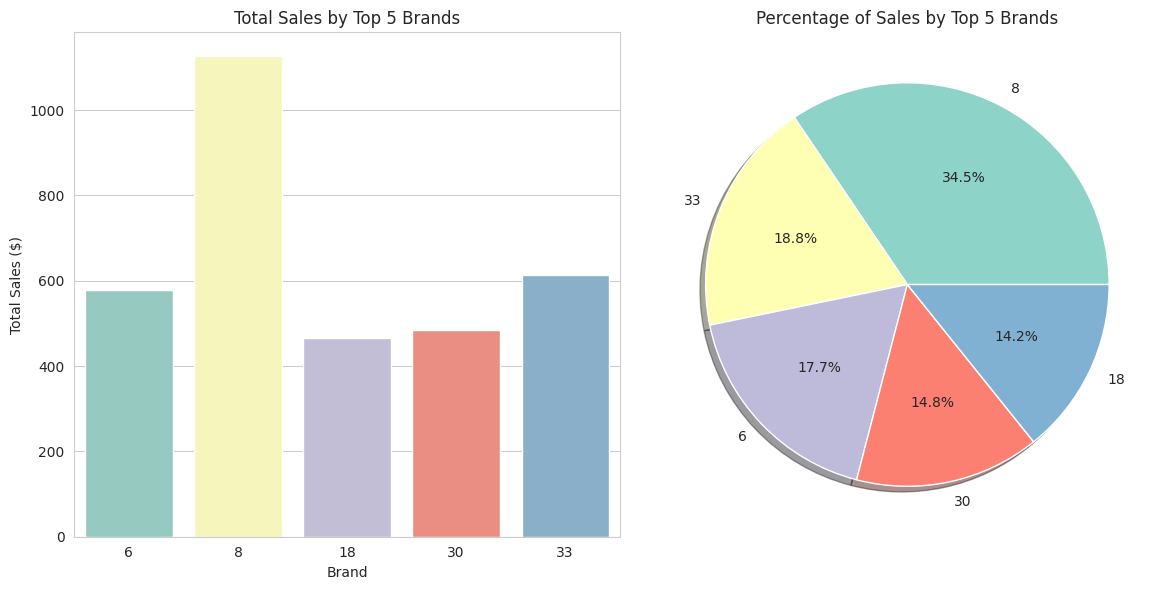

In [ ]:
# Calculate total sales for each brand
total_sales = df.groupby("Brand")["Price"].sum().reset_index()

# Sort the brands by total sales in descending order
top_brands = total_sales.sort_values('Price', ascending=False).head(5)

# Calculate the percentage of sales for each brand
top_brands['Percent'] = (top_brands['Price'] / top_brands['Price'].sum()) * 100

# Create a grid with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot a bar chart for total sales by brand
sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Total Sales ($)')
axes[0].set_title('Total Sales by Top 5 Brands')

# Plot a pie chart for percentage of sales by brand
colors = sns.color_palette('Set3', top_brands.shape[0]).as_hex()
axes[1].pie(top_brands['Percent'], labels=top_brands['Brand'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Percentage of Sales by Top 5 Brands')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(df.columns)

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Display Size', 'Resolution', 'Water Resistance', 'Battery Life',
       'Heart Rate Monitor', 'GPS', 'NFC', 'Price', 'Battery life', 'price'],
      dtype='object')


In [ ]:
df.drop(["price"],axis=1,inplace=True)

In [ ]:
df.drop(["Battery Life"],axis=1,inplace=True)

In [ ]:
# X consists of independent variables
x = df. drop(['Price' ],axis=1)
y = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(76, 13)
(303,)
(76,)


In [ ]:
import numpy as np

# Check for NaN values in x_train (assuming x_train is a NumPy array)
nan_values_x_train = np.isnan(x_train)
print("NaN values in x_train:", np.sum(nan_values_x_train))

print("NaN values in y_train:", y_train.isnull().sum())
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train = imputer.fit_transform(x_train)
y_train = y_train.dropna()  # or use an imputer if needed
print("NaN values in x_train:", np.sum(nan_values_x_train))
print("NaN values in y_train:", y_train.isnull().sum())


NaN values in x_train: Brand                 0
Model                 0
Operating System      0
Connectivity          0
Display Type          0
Display Size          2
Resolution            0
Water Resistance      0
Battery Life          0
Heart Rate Monitor    0
GPS                   0
NFC                   0
Battery life          0
dtype: int64
NaN values in y_train: 0
NaN values in x_train: Brand                 0
Model                 0
Operating System      0
Connectivity          0
Display Type          0
Display Size          2
Resolution            0
Water Resistance      0
Battery Life          0
Heart Rate Monitor    0
GPS                   0
NFC                   0
Battery life          0
dtype: int64
NaN values in y_train: 0


In [ ]:
# Create and fit the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
dtr = DecisionTreeRegressor(max_depth= 2, min_samples_split= 6, min_samples_leaf= 5)
dtr. fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=6)

In [ ]:
rfr = RandomForestRegressor (n_estimators = 50,
                            max_depth = 8,
                            min_weight_fraction_leaf = 0.05,
                            max_features = 0.8,
                            random_state = 42)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [ ]:
gbr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [ ]:
xgb = XGBRegressor (n_estimators=1000, learning_rate=0.06, max_depth=2, subsample=0.7,
                     colsample_bytree=0.4,colsample_bylevel = 0.5,
                     max_leaves = 3, random_state = 1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=3, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Linear Regression Score

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming x_train and y_train are your training features and labels, respectively
lr = LinearRegression()
lr.fit(x_train, y_train)

# Now you can proceed with predictions on the training set
predict_train_lr = lr.predict(x_train)

# Calculate R2 score for training
error_score_lr_train = r2_score(y_train, predict_train_lr)
print("R2 error is: ", error_score_lr_train)

# Calculate Root Mean Squared Error for training
mse = mean_squared_error(y_train, predict_train_lr)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)


R2 error is:  0.25996694617230276
Root Mean Squared Error: 8.747331124016583


In [ ]:
print("NaN values in x_test:", x_test.isna().sum())
print("Infinite values in x_test:", np.isinf(x_test).sum())


NaN values in x_test: Brand                 0
Model                 0
Operating System      0
Connectivity          0
Display Type          0
Display Size          1
Resolution            0
Water Resistance      0
Battery Life          0
Heart Rate Monitor    0
GPS                   0
NFC                   0
Battery life          0
dtype: int64
Infinite values in x_test: Brand                 0
Model                 0
Operating System      0
Connectivity          0
Display Type          0
Display Size          0
Resolution            0
Water Resistance      0
Battery Life          0
Heart Rate Monitor    0
GPS                   0
NFC                   0
Battery life          0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train and transform x_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now, you can make predictions on x_test_imputed
predict_test_lr = lr.predict(x_test_imputed)

# Calculate evaluation metrics as before

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# testing score
error_score_lr_test = r2_score(y_test, predict_test_lr)
print("R2 error is: ", error_score_lr_test)

# Calculate Root Mean Squared Error
mse = mean_squared_error(y_test, predict_test_lr)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)

R2 error is:  0.11246869147544247
Root Mean Squared Error: 9.08527685843389


Decision Tree Regression Model

In [ ]:
# training score
predict_train_dtr = dtr.predict(x_train)
error_score_dtr_train = r2_score(y_train, predict_train_dtr)
print ("R2 error is: ", error_score_dtr_train)
mse = mean_squared_error (y_train, predict_train_dtr)
rmse_dtr_train = np. sqrt(mse)
print( 'Root Mean Squared Error:', rmse_dtr_train)

R2 error is:  0.2693919052594247
Root Mean Squared Error: 8.691450228593034


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train and transform x_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now, you can make predictions on x_test_imputed
predict_test_dtr = dtr.predict(x_test_imputed)

# Calculate evaluation metrics as before

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Now try calculating the R2 score and RMSE again
error_score_dtr_test = r2_score(y_test, predict_test_dtr)
print("R2 error is: ", error_score_dtr_test)

mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)


R2 error is:  0.04159176030595246
Root Mean Squared Error: 9.441078192897196


Random Forest regressor Model

In [ ]:
# training score
predict_train_rfr = rfr.predict(x_train)
error_score_rfr_train = r2_score(y_train, predict_train_rfr)
print("R2 error is: ", error_score_rfr_train)
mse = mean_squared_error (y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)

R2 error is:  0.5838850845475555
Root Mean Squared Error: 6.559287234456285


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train and transform x_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now, you can make predictions on x_test_imputed
predict_test_rfr = rfr.predict(x_test_imputed)

# Calculate evaluation metrics as before


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Calculate R2 score for testing
error_score_rfr_test = r2_score(y_test, predict_test_rfr)
print("R2 error is: ", error_score_rfr_test)

# Calculate Root Mean Squared Error for testing
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)

R2 error is:  0.3059789950946311
Root Mean Squared Error: 8.034014894689525


Gradient Boosting Regressor Model


In [ ]:
predict_train_gbr = gbr.predict(x_train)

# Calculate R2 score for training
error_score_gbr_train = r2_score(y_train, predict_train_gbr)
print("R2 error is: ", error_score_gbr_train)

# Calculate Root Mean Squared Error for training
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)

R2 error is:  0.4805334169451141
Root Mean Squared Error: 7.328731571974177


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train and transform x_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Now, you can make predictions on x_test_imputed
predict_test_gbr = gbr.predict(x_test_imputed)

# Calculate evaluation metrics as before


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
# Calculate R2 score for testing
error_score_gbr_test = r2_score(y_test, predict_test_gbr)
print("R2 error is: ", error_score_gbr_test)

# Calculate Root Mean Squared Error for testing
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

R2 error is:  0.2865620587790102
Root Mean Squared Error: 8.145625251958336


Extreme Gradient Boosting Model


In [ ]:
# Assuming xgb_model is your trained XGBoost model
predict_train_xgb = xgb_model.predict(x_train)

# Calculate R2 score for training
error_score_xgb_train = r2_score(y_train, predict_train_xgb)
print("R2 error is:", error_score_xgb_train)

# Calculate Root Mean Squared Error for training
mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)


R2 error is: 0.9912108391593748
Root Mean Squared Error: 0.9532870947667044


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
predict_test_xgb = xgb_model.predict(x_test)

# Calculate R2 score for testing
error_score_xgb_test = r2_score(y_test, predict_test_xgb)
print("R2 error is:", error_score_xgb_test)

# Calculate Root Mean Squared Error for testing
mse = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_test)

R2 error is: 0.31110391805985316
Root Mean Squared Error: 8.004296773919657


In [ ]:
results = pd.DataFrame(columns=['Model', 'Training R2', 'Testing R2', 'Training RMSE', 'Testing RMSE'])

results.loc[0] = ['Linear Regressor', error_score_lr_train, error_score_lr_test, rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', error_score_dtr_train, error_score_dtr_test, rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', error_score_rfr_train, error_score_rfr_test, rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', error_score_gbr_train, error_score_gbr_test, rmse_gbr_train, rmse_gbr_test]
results.loc[4] = ['XG Boost Regressor', error_score_xgb_train, error_score_xgb_test, rmse_xgb_train, rmse_xgb_test]

print(results)

                         Model  Training R2  Testing R2  Training RMSE  \
0             Linear Regressor     0.259967    0.112469       8.747331   
1      Decision Tree Regressor     0.269392    0.041592       8.691450   
2      Random Forest Regressor     0.583885    0.305979       6.559287   
3  Gradient Boosting Regressor     0.480533    0.286562       7.328732   
4           XG Boost Regressor     0.991211    0.311104       0.953287   

   Testing RMSE  
0      9.085277  
1      9.441078  
2      8.034015  
3      8.145625  
4      8.004297  


In [ ]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Heart Rate Monitor,GPS,NFC,Price,Battery life
0,1,127,34,2,17,1.9,27,50.0,0,1,1,33,18.0
1,30,36,31,2,0,1.4,31,50.0,0,1,1,20,40.0
2,8,105,9,1,0,1.3,30,50.0,0,1,0,33,11.0
3,6,109,7,1,0,1.6,19,50.0,0,1,1,19,6.0
4,7,43,31,1,0,1.3,30,30.0,0,1,1,27,24.0


In [ ]:
import xgboost as xgb
import pickle

# Save the model to a file
with open('maha_model.pkl', 'wb') as file:
    pickle.dump(xgb_model,file)